96.83057900701401

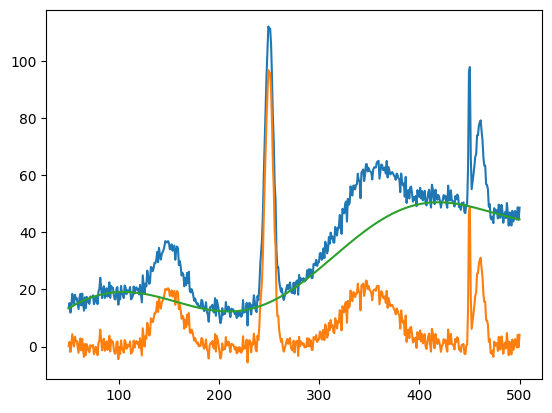

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nb_points  =500
x = np.linspace(50, 500, nb_points)

# gaussian peaks2
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large sin distortion + linear 
bkg = 10*np.sin(x/50) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
y = p1 + p2 + p3 + p4 + p5 + noise + bkg
y1 = y
plt.plot(x,y1)

y = p1 + p2 + p3 + p4 + p5 + noise 
y1 = y
plt.plot(x,y1)

plt.plot(x, bkg)
max(y1)

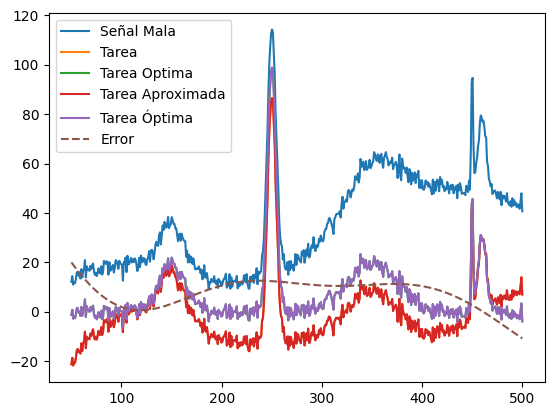

85.599631759787

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
nb_points = 500
x = np.linspace(50, 500, nb_points)

# Picos gaussianos
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# Fondo: distorsión senoidal + lineal
bkg = 10*np.sin(x/50) + 0.1*x

# Ruido
noise = 2.0 * np.random.normal(size=nb_points)

# Señal observada
y = p1 + p2 + p3 + p4 + p5 + noise + bkg

#aplicaremos fourier para analizar la tendencia de la señal 
Y = np.fft.fft(y) #transformada para obtener coeficientes
frequencies = np.fft.fftfreq(nb_points, x[1] - x[0]) # obtenemos las frecuencias para Cada coef

#filtramos ciertas la señal eliminando las frecuencias menores a 0.005
threshold = 0.005  # se puede ajustar para mejor resultado
Y_filtered = np.copy(Y) 
Y_filtered[np.abs(frequencies) > threshold] = 0

# nos daría la tendencia al hacer la inversa y tener la parte real.
y_trend = np.fft.ifft(Y_filtered).real

# Señal mala 
y = p1 + p2 + p3 + p4 + p5 + noise + bkg
y1 = y
plt.plot(x,y1, label='Señal Mala' )
plt.legend()

# restamos la tendencia a nuestra señal y obtenemos la Tarea
y_aproximada = p1 + p2 + p3 + p4 + p5 + noise + bkg -y_trend
plt.plot(x,y_aproximada, label='Tarea')
plt.legend()

# como en realidad debe ser sin bkg
y_optima = p1 + p2 + p3 + p4 + p5 + noise 
plt.plot(x,y_optima, label='Tarea Optima')
plt.legend()

#print(y_aproximada[2])
#print(y_optima[2])

# Calcula el error
error = y_optima - y_aproximada
# Grafica la señal aproximada y la óptima
plt.plot(x, y_aproximada, label='Tarea Aproximada')
plt.plot(x, y_optima, label='Tarea Óptima')

# Grafica el error
plt.plot(x, error, label='Error', linestyle='--')

# Añade la leyenda y muestra la gráfica
plt.legend()
plt.show()

mse = np.mean(error**2)
mse

Threshold óptimo: 0.005
Amplitud de ruido óptima: 2.0
Error cuadrático medio óptimo (MSE): 89.54991699547183


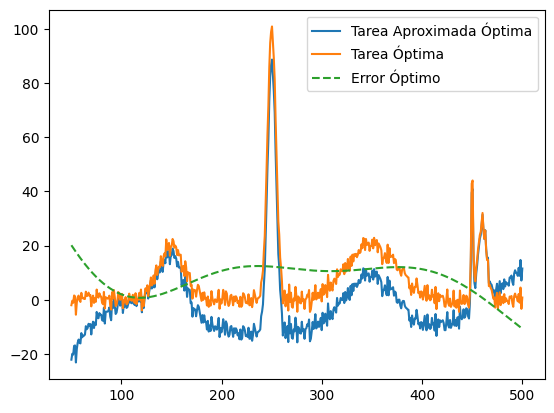

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parámetros de la señal
nb_points = 500
x = np.linspace(50, 500, nb_points)

# Picos gaussianos
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# Fondo: distorsión senoidal + lineal
bkg = 10*np.sin(x/50) + 0.1*x

# Ruido
noise = 2.0 * np.random.normal(size=nb_points)

# Señal observada
y = p1 + p2 + p3 + p4 + p5 + noise + bkg

# Transformada de Fourier
Y = np.fft.fft(y)
frequencies = np.fft.fftfreq(nb_points, x[1] - x[0])

# Función que calcula el MSE dado un umbral y amplitud de ruido
def calcular_mse(params):
    threshold, ruido_amplitud = params
    Y_filtered = np.copy(Y)
    Y_filtered[np.abs(frequencies) > threshold] = 0
    y_trend = np.fft.ifft(Y_filtered).real

    # Genera la señal con el nuevo ruido ajustado
    noise_ajustado = ruido_amplitud * np.random.normal(size=nb_points)
    y_aproximada = p1 + p2 + p3 + p4 + p5 + noise_ajustado + bkg - y_trend
    y_optima = p1 + p2 + p3 + p4 + p5 + noise_ajustado
    
    # Calcula el error cuadrático medio
    error = y_optima - y_aproximada
    mse = np.mean(error**2)
    
    return mse

# Optimización de threshold y amplitud de ruido
resultado = minimize(calcular_mse, x0=[0.005, 2.0], bounds=[(0.001, 0.05), (0.5, 3.0)])
threshold_optimo, ruido_optimo = resultado.x
mse_optimo = resultado.fun

# Mostrar el resultado del threshold y ruido óptimos
print(f"Threshold óptimo: {threshold_optimo}")
print(f"Amplitud de ruido óptima: {ruido_optimo}")
print(f"Error cuadrático medio óptimo (MSE): {mse_optimo}")

# Aplicar el threshold y ruido óptimos para graficar los resultados
Y_filtered_optimo = np.copy(Y)
Y_filtered_optimo[np.abs(frequencies) > threshold_optimo] = 0
y_trend_optima = np.fft.ifft(Y_filtered_optimo).real

# Generar la señal aproximada óptima
noise_optimo = ruido_optimo * np.random.normal(size=nb_points)
y_aproximada_optima = p1 + p2 + p3 + p4 + p5 + noise_optimo + bkg - y_trend_optima
y_optima = p1 + p2 + p3 + p4 + p5 + noise_optimo

# Graficar la señal aproximada y óptima
plt.plot(x, y_aproximada_optima, label='Tarea Aproximada Óptima')
plt.plot(x, y_optima, label='Tarea Óptima')

# Graficar el error
error_optimo = y_optima - y_aproximada_optima
plt.plot(x, error_optimo, label='Error Óptimo', linestyle='--')

# Añadir la leyenda y mostrar la gráfica
plt.legend()
plt.show()


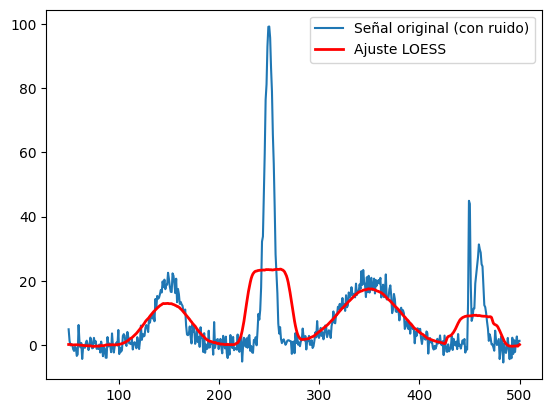

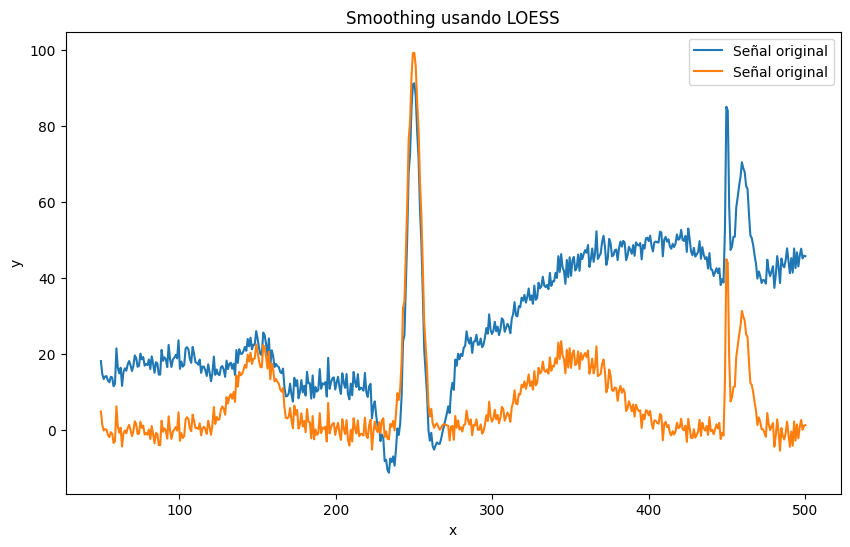

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Definir una función de ajuste polinómico de primer grado
def local_linear_fit(x_local, y_local):
    A = np.vstack([x_local, np.ones(len(x_local))]).T
    # Resolver el sistema de ecuaciones A * [a, b] = y_local para obtener [a, b]
    a, b = np.linalg.lstsq(A, y_local, rcond=None)[0]
    return a, b

# Implementación de LOESS
def loess(x, y, frac):
    # Ordenar los datos por x
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]

    # Inicializar el array para los valores suavizados
    y_loess = np.zeros_like(y)
    
    # Tamaño de la ventana
    window_size = int(frac * len(x))
    
    # Suavizado
    for i in range(len(x)):
        # Definir el rango de la ventana
        start = max(0, i - window_size // 2)
        end = min(len(x), i + window_size // 2 + 1)
        
        # Extraer los datos dentro de la ventana
        x_local = x[start:end]
        y_local = y[start:end]
        
        # Calcular los pesos usando la función de tricube
        dist = np.abs(x_local - x[i])
        weights = (1 - (dist / max(dist.max(), 1e-10))**3)**3
        weights /= weights.sum()  # Normalizar los pesos
        
        # Ajustar el polinomio local
        x_local_weighted = np.average(x_local, weights=weights)
        y_local_weighted = np.average(y_local, weights=weights)
        a, b = local_linear_fit(x_local, y_local)
        
        # Evaluar el polinomio en el punto actual
        y_loess[i] = a * x[i] + b
        
    return y_loess

# Aplicar LOESS
frac = 0.1
y_loess = loess(x, y, frac)

# Graficar los datos originales y el ajuste LOESS
plt.plot(x, y, label='Señal original (con ruido)')
plt.plot(x, y_loess, label='Ajuste LOESS', color='red', linewidth=2)
plt.legend()
plt.show()

y = p1 + p2 + p3 + p4 + p5 + noise + bkg - y_loess

# Graficar la señal original y la tendencia calculada por LOESS
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Señal original')

y = p1 + p2 + p3 + p4 + p5 + noise

# Graficar la señal original y la tendencia calculada por LOESS
plt.plot(x, y, label='Señal original')
#plt.plot(x_loess, y_loess, label='Tendencia LOESS', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Smoothing usando LOESS')
plt.show()

#plt.plot(x_loess, y_loess, label='Tendencia LOESS', color='red', linewidth=2)

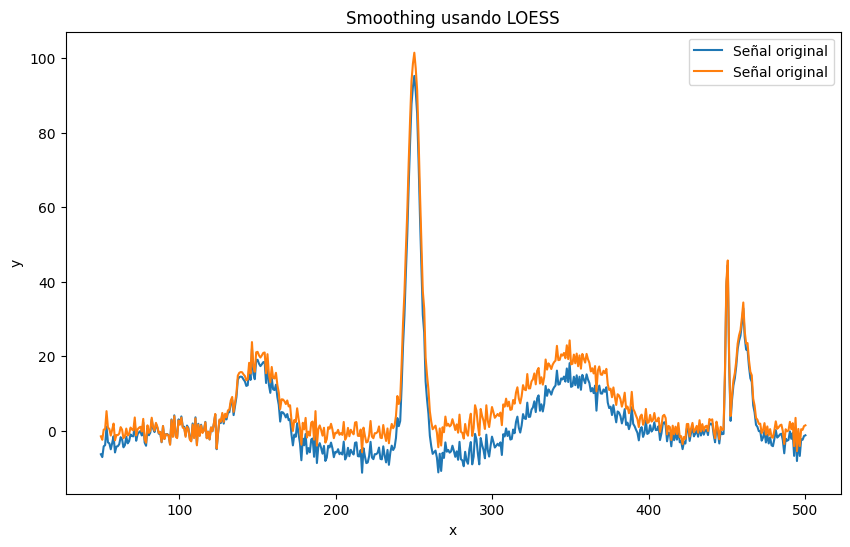

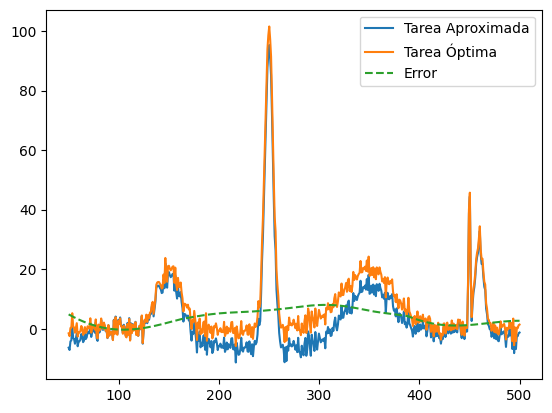

21.079260015114837

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Definir los datos de ejemplo (la señal original)
nb_points = 500
x = np.linspace(50, 500, nb_points)
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# Fondo y ruido
bkg = 10 * np.sin(x / 50) + 0.1 * x
noise = 2.0 * np.random.normal(size=nb_points)

# Observación total
y = p1 + p2 + p3 + p4 + p5 + noise + bkg

# Aplicar LOESS (Lowess)
# frac: proporción de datos usados para calcular cada valor suavizado
loess_result = lowess(y, x, frac=0.5)

# Separar los resultados
x_loess = loess_result[:, 0]
y_loess = loess_result[:, 1]

y1 = p1 + p2 + p3 + p4 + p5 + noise + bkg - y_loess

# Graficar la señal original y la tendencia calculada por LOESS
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Señal original')
#plt.plot(x_loess, y_loess, label='Tendencia LOESS', color='red', linewidth=2)
# Graficar la señal original y la tendencia calculada por LOESS
y = p1 + p2 + p3 + p4 + p5 + noise 
plt.plot(x, y, label='Señal original')
#plt.plot(x_loess, y_loess, label='Tendencia LOESS', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Smoothing usando LOESS')
plt.show()

# Calcula el error
error = y - y1
# Grafica la señal aproximada y la óptima
plt.plot(x, y1, label='Tarea Aproximada')
plt.plot(x, y, label='Tarea Óptima')

# Grafica el error
plt.plot(x, error, label='Error', linestyle='--')

# Añade la leyenda y muestra la gráfica
plt.legend()
plt.show()

mse = np.mean(error**2)
mse


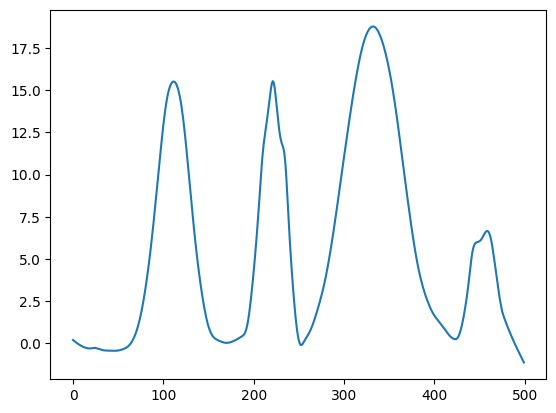

In [3]:
plt.plot(y_loess - bkg)


In [43]:
print(min(y1))
print(min(y2))
print(min(bkg))
abs(min(bkg)-min(y1))

-7.368159705665574
-6.089675498153292
12.28375297385131


19.651912679516883

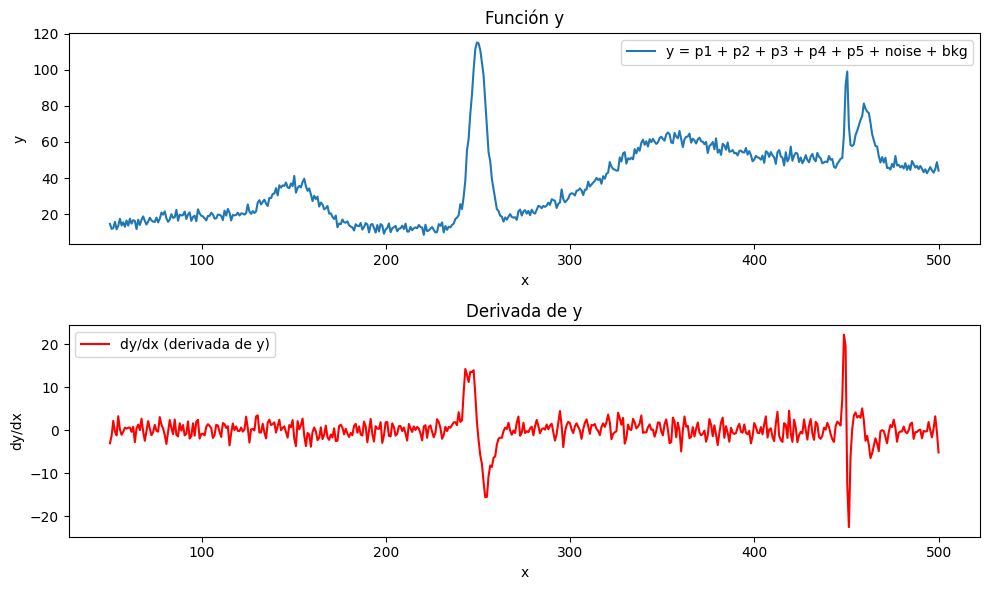

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
nb_points = 500
x = np.linspace(50, 500, nb_points)

# Definir los picos gaussianos
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/5.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/1.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/30.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# Fondo: una gran distorsión senoidal + lineal
bkg = 10 * np.sin(x / 50) + 0.1 * x

# Añadir ruido
noise = 2.0 * np.random.normal(size=nb_points)

# Observación total
y = p1 + p2 + p3 + p4 + p5 + noise + bkg

# Derivada numérica de y usando diferencias finitas
dy_dx = np.gradient(y, x)

# Graficar la función y y su derivada
plt.figure(figsize=(10, 6))

# Graficar y (observación)
plt.subplot(2, 1, 1)
plt.plot(x, y, label='y = p1 + p2 + p3 + p4 + p5 + noise + bkg')
plt.title('Función y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Graficar la derivada de y
plt.subplot(2, 1, 2)
plt.plot(x, dy_dx, label="dy/dx (derivada de y)", color='r')
plt.title('Derivada de y')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()

plt.tight_layout()
plt.show()


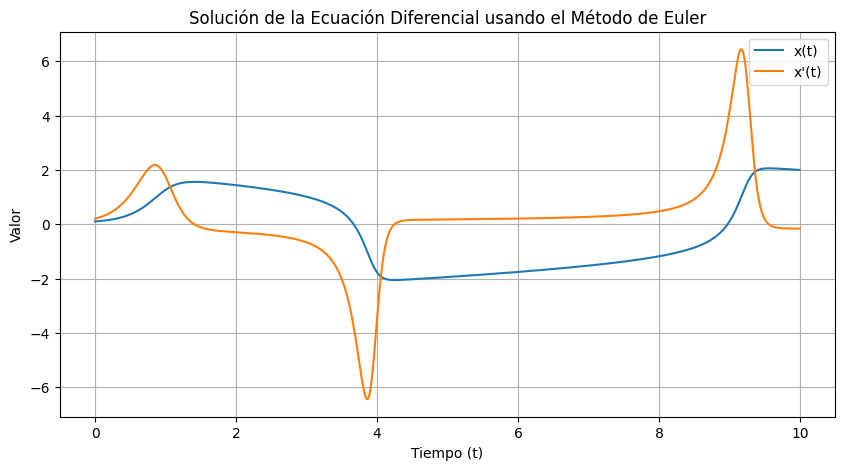

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
mu = 4
dt = 0.01  # Paso de tiempo
n_steps = 1000  # Número de pasos
t = np.arange(0, n_steps*dt, dt)  # Vector de tiempo

# Inicialización de variables
x1 = np.zeros(n_steps)
x2 = np.zeros(n_steps)
x1[0] = 0.1  # Condición inicial x(0)
x2[0] = 0.2  # Condición inicial x'(0)

# Método de Euler
for i in range(1, n_steps):
    x1[i] = x1[i-1] + dt * x2[i-1]
    x2[i] = x2[i-1] + dt * (4 * (1 - x1[i-1]**2) * x2[i-1] - x1[i-1])

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(t, x1, label='x(t)')
plt.plot(t, x2, label="x'(t)")
plt.xlabel('Tiempo (t)')
plt.ylabel('Valor')
plt.title('Solución de la Ecuación Diferencial usando el Método de Euler')
plt.legend()
plt.grid(True)
plt.show()


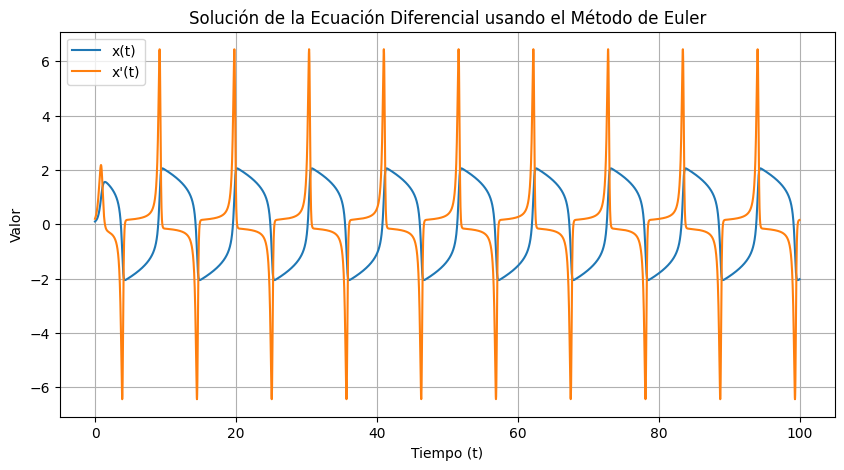

2.0559887785974458

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
mu = 4
dt = 0.01
n_steps = 10000  # Número de pasos
t = np.arange(0, n_steps*dt, dt)  # Vector de tiempo

# Inicialización de variables
x = np.zeros(n_steps + 1)
z = np.zeros(n_steps + 1)
x[0] = 0.1  # Valor inicial de x
z[0] = 0.2  # Valor inicial de x'

# Método de Euler
for i in range(1, n_steps):
    x[i] = x[i-1] + dt * z[i-1]
    z[i] = z[i-1] + dt *( mu * (1 - x[i-1]**2) * z[i-1] - x[i-1])


    
# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(t, x[:-1], label='x(t)')
plt.plot(t, z[:-1], label="x'(t)")
plt.xlabel('Tiempo (t)')
plt.ylabel('Valor')
plt.title('Solución de la Ecuación Diferencial usando el Método de Euler')
plt.legend()
plt.grid(True)
plt.show()
max(x)

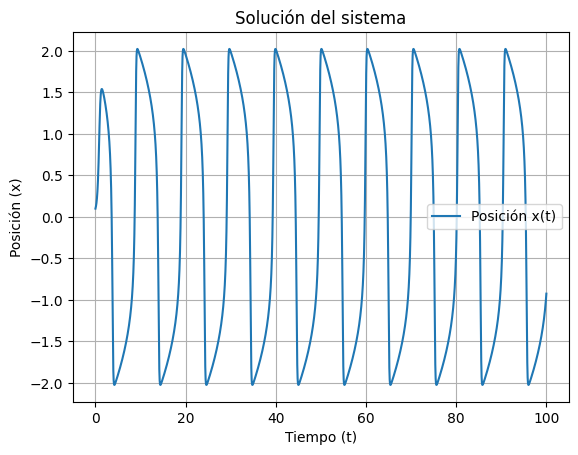

-1.8997995598040172


In [150]:
# Parámetros
mu = 4
dt = 0.01
n_steps = 10000  # Número de pasos
t = np.arange(0, n_steps*dt, dt)  # Vector de tiempo
x = np.zeros(n_steps )
z = np.zeros(n_steps )
x[0] = 0.1  # Valor inicial de x
z[0] = 0.2  # Valor inicial de x'
g1 = 0
g2 = 0
g3 = 0
g4 = 0
f1 = 0
f2 = 0
f3 = 0
f4 = 0

for i in range(1, n_steps):
    g1 = z[i-1]
    f1 = mu * (1 - x[i-1]**2) * z[i-1] - x[i-1]
    g2 = z[i-1] + dt/2 * f1
    f2 = mu * (1 - (x[i-1]+(dt/2)*g1)**2) * (z[i-1] + (dt/2)*f1) - (x[i-1] + (dt/2)*g1)
    g3 = z[i-1] + dt/2 * f2
    f3 = mu * (1 - (x[i-1]+(dt/2)*g2)**2) * (z[i-1] + (dt/2)*f2) - (x[i-1] + (dt/2)*g2)
    g4 = z[i-1] + dt * f3
    f4 = mu * (1 - (x[i-1] + dt*g3)**2) * (z[i-1] + dt*f3) - (x[i-1] + dt*g3)
    x[i] = x[i-1] + dt/6 * (g1+ 2*g2 + 2*g3 +g4)
    z[i] = z[i-1] + dt/6 * (f1+ 2*f2 + 2*f3 + f4)


# Graficar la solución
plt.plot(t, x, label='Posición x(t)')

plt.xlabel('Tiempo (t)')
plt.ylabel('Posición (x)')
plt.title('Solución del sistema')
plt.legend()
plt.grid(True)
plt.show()

In [151]:
# Parámetros
mu = 4
dt = 0.01
n_steps = 10000  # Número de pasos
t = np.arange(0, n_steps*dt, dt)  # Vector de tiempo
x = np.zeros(n_steps )
z = np.zeros(n_steps )
x[0] = 0.1  # Valor inicial de x
z[0] = 0.2  # Valor inicial de x'

for i in range(1, 1000):
    g1 = z[0]
    f1 = mu * (1 - x[0]**2) * z[0] - x[0]
    g2 = z[0] + dt/2 * f1
    f2 = mu * (1 - (x[0]+(dt/2)*g1)**2) * (z[0] + (dt/2)*f1) - (x[0] + (dt/2)*g1)
    g3 = z[0] + dt/2 * f2
    f3 = mu * (1 - (x[0]+(dt/2)*g2)**2) * (z[0] + (dt/2)*f2) - (x[0] + (dt/2)*g2)
    g4 = z[0] + dt * f3
    f4 = mu * (1 - (x[0] + dt*g3)**2) * (z[0] + dt*f3) - (x[0] + dt*g3)
    x[1] = x[0] + dt/6 * (g1+ 2*g2 + 2*g3 +g4)
    z[1] = z[0] + dt/6 * (f1+ 2*f2 + 2*f3 + f4)
    
    print(x[1], x[0], i)
    
    x[0] = z[1]
    z[0] = z[1]

0.10203502173489186 0.1 1
0.2091469827740357 0.2070469019250704 2
0.2151629112276552 0.21300253200098226 3
0.22132939332250295 0.2191072162829416 4
0.22764821333476468 0.22536272216786638 5
0.2341209923568748 0.2317706555755063 6
0.24074916955669853 0.23833244239796758 7
0.24753398245521438 0.24504930897729935 8
0.25447644625595306 0.25192226164399273 9
0.26157733227507196 0.2589520653647032 10
0.2688371455385155 0.26613922156489417 11
0.2762561016322648 0.27348394521144903 12
0.2838341029132068 0.2809861412616046 13
0.2915707142116006 0.2886453806077635 14
0.29946513818136333 0.29646087567273205 15
0.30751619048125634 0.30443145583651365 16
0.315722274998245 0.3125555429036984 17
0.3240813593534721 0.3208311268493638 18
0.3325909509609557 0.3292557421107786 19
0.3412480739387215 0.3378264447215117 20
0.3500492472009147 0.346539790613105 21
0.35899046408670277 0.35539181543647774 22
0.3680671739065593 0.3643780162797777 23
0.37727426580778706 0.3734933356804777 24
0.3866060553777903 0.

[8.05357806e-01+0.12102453j 8.05357806e-01-0.12102453j
 5.46208295e-01+0.14638281j 5.46208295e-01-0.14638281j
 4.50552158e-05+0.j        ]


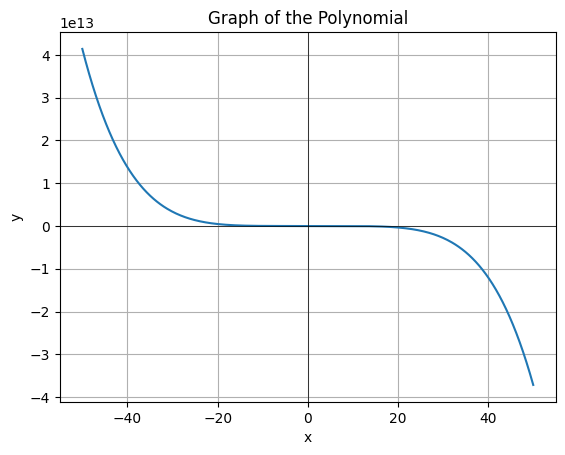

In [161]:
R=1500
#coef = [1.2, 1500*17.7-1, -103.79, 229.62, -226.31, 83.72]
coef = [-R*83.72, R*226.31, -R*229.62, R*103.79, -R*17.76-1, 1.2]

print(np.roots(coef))

# Define el rango de valores de x
x = np.linspace(-50, 50, 400)  # Ajusta el rango según el comportamiento de tu polinomio

# Evalúa el polinomio en el rango de valores x
y = np.polyval(coef, x)

# Grafica el polinomio
plt.plot(x, y)
plt.axhline(0, color='black',linewidth=0.5)  # Línea horizontal en y=0 (eje x)
plt.axvline(0, color='black',linewidth=0.5)  # Línea vertical en x=0 (eje y)
plt.title('Graph of the Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

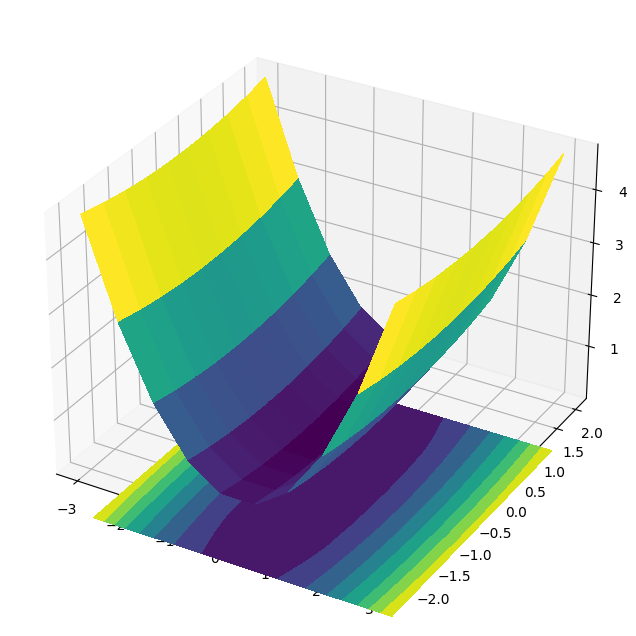

In [204]:
x1 = np.linspace(-3,3,10)
x2 = np.linspace(-2,2,10)
X1, X2 = np.meshgrid(x1,x2)

V = lambda x1,x2: 1/2 * x1**2 + 1/16 * x2**2

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (10,8))
surf = ax.plot_surface(X1, X2, V(X1, X2), cmap = 'viridis', linewidth = 0, antialiased = False)
#?ax.contourf
ax.contourf(X1, X2, V(X1,X2), cmap = 'viridis', offset=-1)
#fig2=ax.contour(X1, X2, V(X1,X2), cmap = 'viridis', offset=-1)

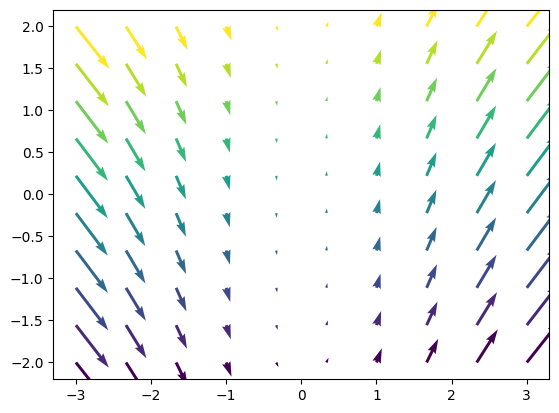

In [205]:
u = 2*X1
v = 2*X2
plt.figure
plt.quiver(X1,X2, V(X1,X2), u, v)

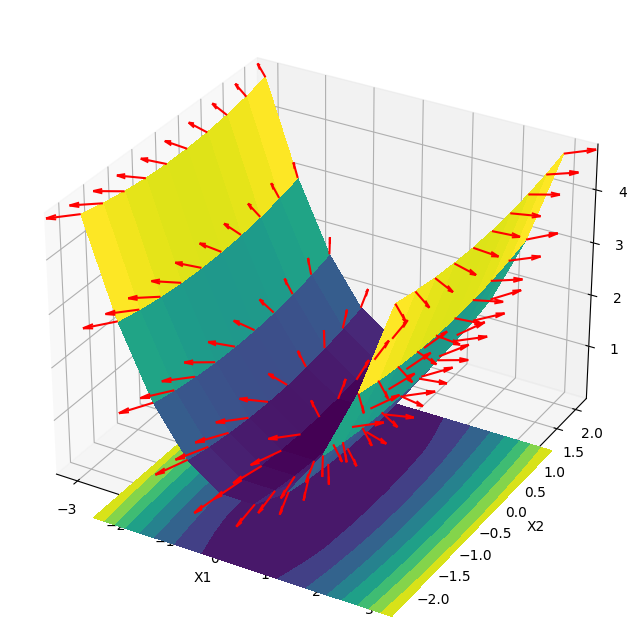

In [206]:
# Crear la figura y el eje 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))

# Gráfico de superficie
surf = ax.plot_surface(X1, X2, V(X1, X2), cmap='viridis', linewidth=0, antialiased=False)

# Gráfico de contornos en 3D
ax.contourf(X1, X2, V(X1, X2), cmap='viridis', offset=-1)

# Agregar el campo vectorial en el plano 3D con flechas de color rojo
ax.quiver(X1, X2, V(X1, X2), u, v, np.zeros_like(u), length=0.5, normalize=True, color='red')

# Configuración de ejes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('V(X1, X2)')

plt.show()